In [1]:
import numpy as np
import pandas as pd

Reading the protein:

In [2]:
from Bio import SeqIO
genome = SeqIO.read('/kaggle/input/grch38-human-genome-dna/Homo_sapiens.GRCh38.dna.chromosome.1.fa','fasta')

In [3]:
print('Length of the sequence: ',len(genome))

Length of the sequence:  248956422


In [4]:
genome_DNA = genome.seq

Finding out the distribution of nucleotides:

In [5]:
count_A = genome_DNA.count('A')
count_G = genome_DNA.count('G')
count_C = genome_DNA.count('C')
count_T = genome_DNA.count('T')

# Calculate the percentages
total_count = len(genome_DNA)
percentage_A = (count_A / total_count) * 100
percentage_G = (count_G / total_count) * 100
percentage_C = (count_C / total_count) * 100
percentage_T = (count_T / total_count) * 100

# Print the percentages
print("Percentage of A: {:.2f}%".format(percentage_A))
print("Percentage of G: {:.2f}%".format(percentage_G))
print("Percentage of C: {:.2f}%".format(percentage_C))
print("Percentage of T: {:.2f}%".format(percentage_T))

Percentage of A: 26.94%
Percentage of G: 19.33%
Percentage of C: 19.30%
Percentage of T: 27.01%


Plotting a graph to show distribution of nucleotides:

<BarContainer object of 4 artists>

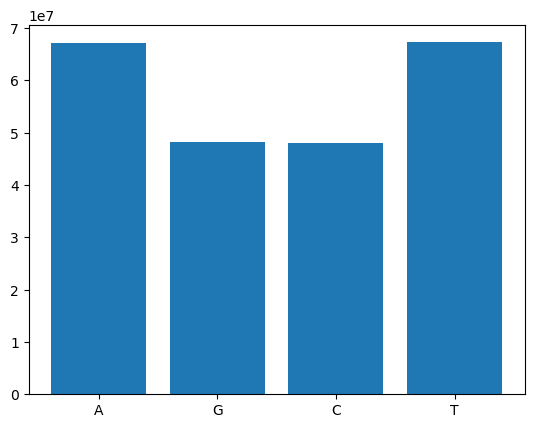

In [6]:
import matplotlib.pyplot as plt

nucleotides = {'A': count_A, 'G': count_G, 'C': count_C, 'T': count_T}

x = list(nucleotides.keys())
y = list(nucleotides.values())

plt.bar(x,y)

Transcribing to find the RNA:

In [7]:
genome_RNA = genome_DNA.transcribe()
print(genome_DNA[:100])
print(genome_RNA[:100])

NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN


A graph for RNA:

<BarContainer object of 4 artists>

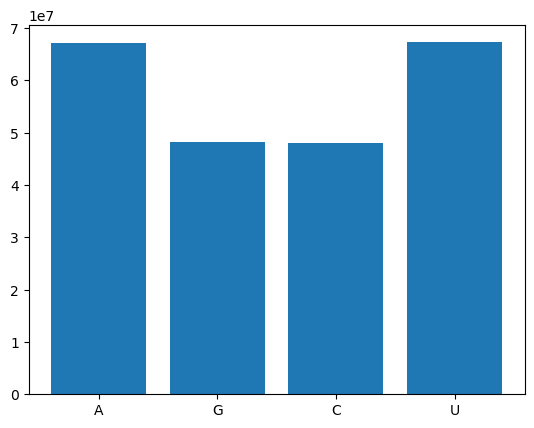

In [8]:
count_U = genome_RNA.count('U')

import matplotlib.pyplot as plt

ribonucleotides = {'A': count_A, 'G': count_G, 'C': count_C, 'U': count_U}

x = list(ribonucleotides.keys())
y = list(ribonucleotides.values())

plt.bar(x,y)

In [9]:
genome_pro = genome_DNA.translate()
print('DNA: ',genome_DNA[:100])
print('Proteins: ',genome_pro[:100])

DNA:  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
Proteins:  XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


Creating a checkpoint with the protein sequence:

In [10]:
file = open('/kaggle/working/checkpoint_genome_pro.txt','w')
checkpoint1 = file.write(str(genome_pro))
file.close()

In [11]:
functional_pro = str(genome_pro).split('*')

functional_pro = [i for i in functional_pro if len(i)>=20 if 'X' not in str(i)]

print('Number of Functional Proteins: ',len(functional_pro))

Number of Functional Proteins:  1290444


Creating a dataframe with the sequences:

In [12]:
import pandas as pd

df = pd.DataFrame(columns=['sequence no', 'amino acid sequence', 'sequence length'])

# Iterate over the extracted sequences and add them to the DataFrame
for i in range(len(functional_pro)//100):
    df.loc[i] = [i+1, str(functional_pro[i]), len(str(functional_pro[i]))]

df

,sequence no,amino acid sequence,sequence length
0,1,PSRYPQPARPPGSDLRRTVLRLQSTTEICAEDNAAPPSRCSPGLC,45
1,2,GERNSAVAKARRAGAGAERRAAPAQAQRGAPRRRRRREARRAGAGA...,222
2,3,SGGQRPLLAPGHCRALLLTV,20
3,4,WWHAACWQLGTLQGPLAQGVVAARPPAGSWGHCRALLLQQYWRIIG...,74
4,5,LPSELYCSVSHQQCLGMPVSPQSVYFWIFASLTGEALEILISDLGW...,57
...,...,...,...
12899,12900,ASDRMEWHPHLQVSIRQPGT,20
12900,12901,QPGTASTPPGEHLTAWNGILTSR,23
12901,12902,ASDSLEQNSPTTGEDLTAWNRTPLFQVRI,29
12902,12903,HIKQHPATPGEHLTVWNSIHTPRRASDSLE,30


Model 1- K-Means Clustering using Sci-kit:

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['amino acid sequence']

vectorizer = TfidfVectorizer()
X_encoded = vectorizer.fit_transform(X)

In [14]:
from sklearn.cluster import KMeans

def make_model(num_clusters):
    model = KMeans(n_clusters=num_clusters, random_state=42, n_init=100)
    model.fit(X_encoded)
    temp_df = pd.DataFrame()
    temp_df['Cluster'] = model.labels_
    print(temp_df['Cluster'].value_counts())
    for i in temp_df['Cluster'].value_counts():
        if i>1000:
            return -1
    return temp_df['Cluster'].value_counts()

for i in [10,100,200,500,1000,1500,2000]:
    print(i, make_model(i))
    print('*******')

0    12883
9        9
5        3
1        2
3        2
4        1
6        1
8        1
2        1
7        1
Name: Cluster, dtype: int64
10 -1
*******
0     12739
59        9
67        5
89        3
18        3
      ...  
83        1
29        1
11        1
2         1
76        1
Name: Cluster, Length: 100, dtype: int64
100 -1
*******
0      12572
177        9
72         6
27         5
148        4
       ...  
138        1
71         1
40         1
42         1
32         1
Name: Cluster, Length: 200, dtype: int64
200 -1
*******
0      12125
435        9
412        6
62         5
175        4
       ...  
94         1
322        1
454        1
350        1
443        1
Name: Cluster, Length: 500, dtype: int64
500 -1
*******
0      11464
20         9
235        6
358        5
651        4
       ...  
855        1
202        1
838        1
904        1
526        1
Name: Cluster, Length: 1000, dtype: int64
1000 -1
*******
0       10862
99          9
39          6
85          5
196  

Model 2- K-Means Clustering, vectorization using Word2Vec:
(Best Approach Discovered)

In [15]:
import pandas as pd
from gensim.models import Word2Vec

sequences = []
column_sequences = df['amino acid sequence'].astype(str).tolist()
sequences.append(column_sequences)

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences=sequences, vector_size=100, window=5, min_count=1, workers=4)

column_sequences = df['amino acid sequence'].astype(str).tolist()
column_vectors = [word2vec_model.wv[seq] for seq in column_sequences]

df['amino acid sequence_vector'] = column_vectors

In [16]:
df

,sequence no,amino acid sequence,sequence length,amino acid sequence_vector
0,1,PSRYPQPARPPGSDLRRTVLRLQSTTEICAEDNAAPPSRCSPGLC,45,"[-0.0078987405, 0.0076825824, 0.001619442, -0...."
1,2,GERNSAVAKARRAGAGAERRAAPAQAQRGAPRRRRRREARRAGAGA...,222,"[0.007951678, -0.0051187673, 0.0021075392, 0.0..."
2,3,SGGQRPLLAPGHCRALLLTV,20,"[0.008713442, -0.0036859794, 0.0031177257, 0.0..."
3,4,WWHAACWQLGTLQGPLAQGVVAARPPAGSWGHCRALLLQQYWRIIG...,74,"[1.3449761e-05, 0.00033423086, -0.00053321273,..."
4,5,LPSELYCSVSHQQCLGMPVSPQSVYFWIFASLTGEALEILISDLGW...,57,"[-0.009102929, -0.00069292466, -0.0017974566, ..."
...,...,...,...,...
12899,12900,ASDRMEWHPHLQVSIRQPGT,20,"[0.0010450089, -0.0079291295, 0.003567686, -0...."
12900,12901,QPGTASTPPGEHLTAWNGILTSR,23,"[-0.00850947, 0.0022224986, 0.0081393095, -0.0..."
12901,12902,ASDSLEQNSPTTGEDLTAWNRTPLFQVRI,29,"[-0.004682721, -0.0012132669, 0.009122106, -0...."
12902,12903,HIKQHPATPGEHLTVWNSIHTPRRASDSLE,30,"[0.006000531, -0.004163214, -0.0002589202, -0...."


In [17]:
from sklearn.cluster import KMeans

vectors = df['amino acid sequence_vector'].values  # Access the vector arrays in the column
vectors = np.stack(vectors)

def make_model(num_clusters):
    model = KMeans(n_clusters=num_clusters, random_state=42, n_init=100)
    model.fit(vectors)
    temp_df = pd.DataFrame()
    temp_df['Cluster'] = model.labels_
    print(temp_df['Cluster'].value_counts())
    for i in temp_df['Cluster'].value_counts():
        if i>1000:
            return -1
    return 1

for i in [10,100]:
    print(i, make_model(i))
    print('*******')

3    1361
5    1356
1    1317
2    1307
7    1293
6    1283
4    1277
8    1271
9    1240
0    1199
Name: Cluster, dtype: int64
10 -1
*******
81    161
19    156
51    155
82    155
39    155
     ... 
91    105
59    105
97    104
83    101
7     100
Name: Cluster, Length: 100, dtype: int64
100 1
*******


Taking the best model, and appending the clusters into the main dataframe:

In [18]:
from sklearn.cluster import KMeans

vectors = df['amino acid sequence_vector'].values
vectors = np.stack(vectors)

best_num_clusters = 100

model = KMeans(n_clusters=best_num_clusters, random_state=42, n_init=100)
model.fit(vectors)
df['Cluster'] = model.labels_

In [19]:
df['Cluster'].value_counts()

81    161
19    156
51    155
82    155
39    155
     ... 
91    105
59    105
97    104
83    101
7     100
Name: Cluster, Length: 100, dtype: int64

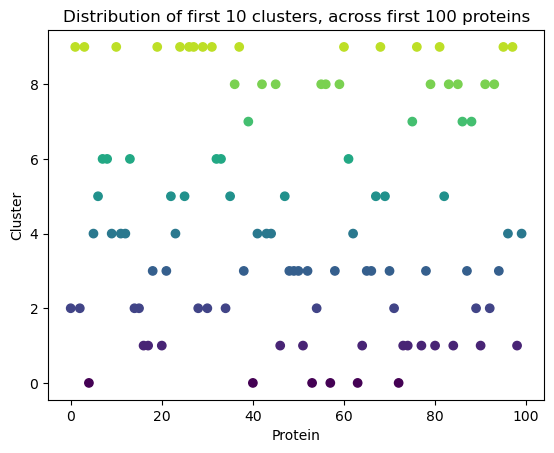

In [20]:
import matplotlib.pyplot as plt

x = [i for i in range(100)]
y = [i for i in df['Cluster'] if i < 10]
y = y[:100]

unique_y = list(set(y))
num_colors = len(unique_y)

# Use a colormap to assign unique colors to unique y values
cmap = plt.get_cmap('viridis')
colors = [cmap(i/num_colors) for i in range(num_colors)]

# Assign colors to y values based on their index in the unique_y list
c = [colors[unique_y.index(val)] for val in y]

plt.scatter(x, y, c=c)
plt.title('Distribution of first 10 clusters, across first 100 proteins')
plt.ylabel('Cluster')
plt.xlabel('Protein')
plt.show()

A graph between the clusters and the PCA

/tmp/ipykernel_20/1898764825.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', num_clusters)  # Use tab10 colormap with the number of clusters


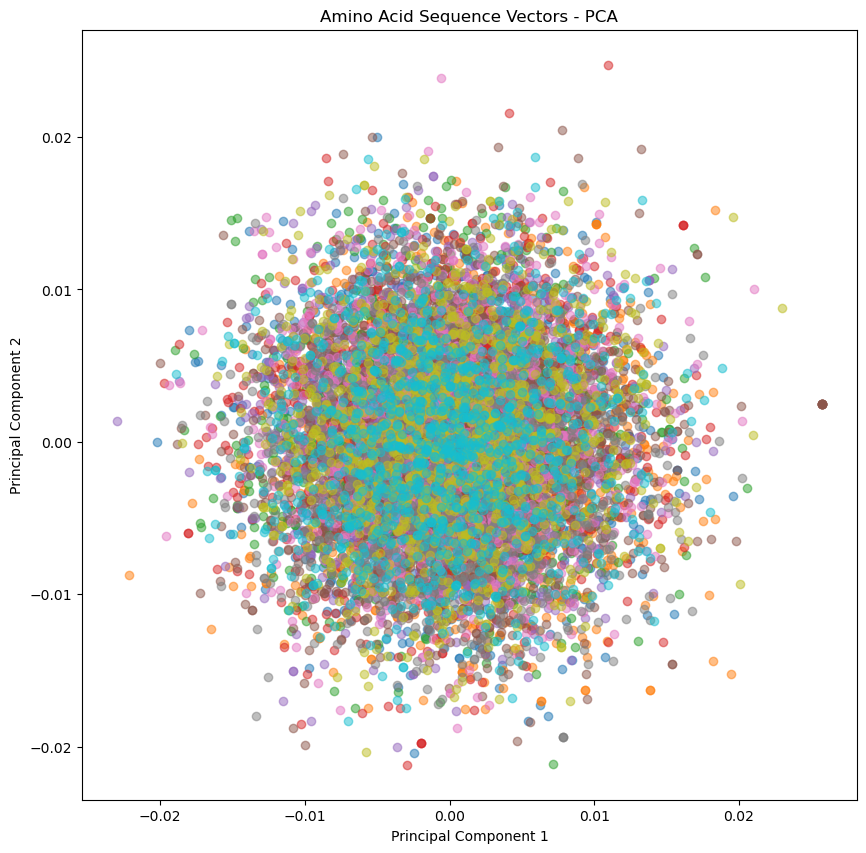

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

vectors = df['amino acid sequence_vector'].values
vectors = np.stack(vectors)

cluster_labels = df['Cluster']

num_clusters = 100

# Perform PCA on the word vectors
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)

# Define a color map for the clusters
color_map = plt.cm.get_cmap('tab10', num_clusters)  # Use tab10 colormap with the number of clusters

# Plot the word vectors with cluster colors
plt.figure(figsize=(10, 10))
for i in range(num_clusters):
    plt.scatter(vectors_pca[cluster_labels == i, 0], vectors_pca[cluster_labels == i, 1],
                color=color_map(i), alpha=0.5, label=f'Cluster {i+1}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Amino Acid Sequence Vectors - PCA')
plt.show()

In [22]:
import numpy as np
import plotly.graph_objs as go
from sklearn.decomposition import PCA

vectors = df['amino acid sequence_vector'].values
vectors = np.stack(vectors)

cluster_labels = df['Cluster']

num_clusters = 100

# Perform PCA on the word vectors
pca = PCA(n_components=3)
vectors_pca = pca.fit_transform(vectors)

# Create a 3D scatter plot
trace = go.Scatter3d(
    x=vectors_pca[:, 0],
    y=vectors_pca[:, 1],
    z=vectors_pca[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=cluster_labels,
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Principal Component 1'),
        yaxis=dict(title='Principal Component 2'),
        zaxis=dict(title='Principal Component 3')
    ),
    title='Amino Acid Sequence Vectors - PCA'
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Display the interactive plot
fig.show()

Checkpoint 2: Saving the model

In [23]:
from sklearn.cluster import KMeans
import joblib

joblib.dump(model, '/kaggle/working/checkpoint2_model.pkl')

['/kaggle/working/checkpoint2_model.pkl']

Uncomment to load model:

In [24]:
#import joblib

#model = joblib.load('/kaggle/working/checkpoint2_model.pkl')

Running the model on the other 1/10th proteins that were ignored:

In [25]:
import pandas as pd

df_predict = pd.DataFrame(columns=['sequence no', 'amino acid sequence', 'sequence length'])

# Iterate over the extracted sequences and add them to the DataFrame
for i in range(len(functional_pro)//100, 2*len(functional_pro)//100):
    df_predict.loc[i] = [i+1, str(functional_pro[i]), len(str(functional_pro[i]))]

df_predict

,sequence no,amino acid sequence,sequence length
12904,12905,QPGAAPTPPGEHLTAWGSAHSPR,23
12905,12906,ASDSPEQRPHPQVSIWQPGAAPTPPGEHLTAWSSAHTLR,39
12906,12907,ASDSLGQHPHPQVSIWQPGTASTAPGDHLTA,31
12907,12908,ACDHMECHPHLQVSIRQPGTEFSNPR,26
12908,12909,QHGTRPLLPGEHLTTWESTLHPHVSI,26
...,...,...,...
25803,25804,IHYLTRERALLSDLAAFTLP,20
25804,25805,ATSSETPGRWRRRLVPVHTPHQKPAFHSCSNECNPFSEDTAPASRKTQ,48
25805,25806,HGASILLFVSVHCSLAFAYLALAGKS,26
25806,25807,CICVIEVHMEGLVCRNLLLCWGQMVLLPIFHLSLSLGPREALSPTG...,67


In [26]:
#Vectorization
import pandas as pd
from gensim.models import Word2Vec

sequences = []
column_sequences = df_predict['amino acid sequence'].astype(str).tolist()
sequences.append(column_sequences)

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences=sequences, vector_size=100, window=5, min_count=1, workers=4)

column_sequences = df_predict['amino acid sequence'].astype(str).tolist()
column_vectors = [word2vec_model.wv[seq] for seq in column_sequences]
df_predict['amino acid sequence_vector'] = column_vectors

In [27]:
df_predict

,sequence no,amino acid sequence,sequence length,amino acid sequence_vector
12904,12905,QPGAAPTPPGEHLTAWGSAHSPR,23,"[-0.006587245, 0.0060783187, 0.0023141021, -0...."
12905,12906,ASDSPEQRPHPQVSIWQPGAAPTPPGEHLTAWSSAHTLR,39,"[0.003563289, 0.007832688, 0.0059805955, 0.006..."
12906,12907,ASDSLGQHPHPQVSIWQPGTASTAPGDHLTA,31,"[0.0026027581, -0.00095615524, -0.0032015108, ..."
12907,12908,ACDHMECHPHLQVSIRQPGTEFSNPR,26,"[0.0050155898, -0.0060642683, 0.008412093, 0.0..."
12908,12909,QHGTRPLLPGEHLTTWESTLHPHVSI,26,"[-0.005244222, 0.0053278417, -0.0068039848, -0..."
...,...,...,...,...
25803,25804,IHYLTRERALLSDLAAFTLP,20,"[0.0033251108, -0.00046917557, 0.0073491894, 0..."
25804,25805,ATSSETPGRWRRRLVPVHTPHQKPAFHSCSNECNPFSEDTAPASRKTQ,48,"[-0.0014644993, -0.0066473307, 0.009107728, -0..."
25805,25806,HGASILLFVSVHCSLAFAYLALAGKS,26,"[-0.0060300673, 0.0022115076, -0.006948286, -0..."
25806,25807,CICVIEVHMEGLVCRNLLLCWGQMVLLPIFHLSLSLGPREALSPTG...,67,"[-0.003141067, -0.0032667709, 0.00081940414, 0..."


In [28]:
from sklearn.cluster import KMeans

vectors_predict = df_predict['amino acid sequence_vector'].values
vectors_predict = np.stack(vectors)

model.predict(vectors_predict)

df_predict['Cluster'] = model.labels_

In [29]:
df_predict['Cluster'].value_counts()

81    161
19    156
51    155
82    155
39    155
     ... 
91    105
59    105
97    104
83    101
7     100
Name: Cluster, Length: 100, dtype: int64

A graph between clusters and PCA:

/tmp/ipykernel_20/1486834502.py:17: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



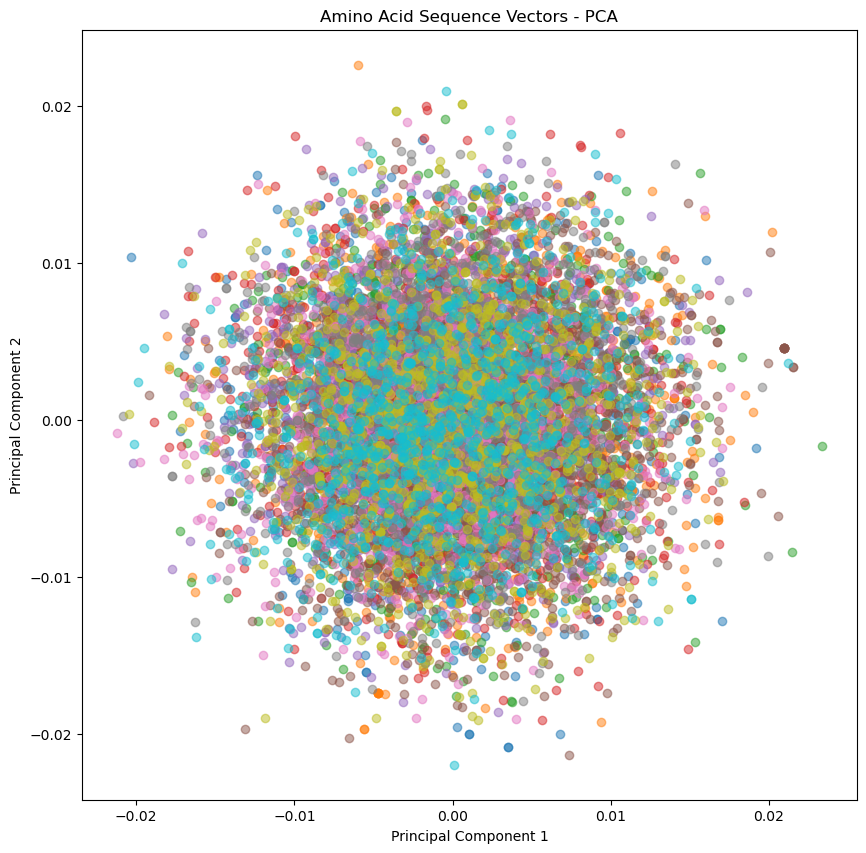

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

vectors_predict = df_predict['amino acid sequence_vector'].values
vectors_predict = np.stack(vectors)

cluster_predict_labels = df_predict['Cluster']

num_clusters = 100

# Perform PCA on the word vectors
pca = PCA(n_components=2)
vectors_predict_pca = pca.fit_transform(vectors)

# Define a color map for the clusters
color_map = plt.cm.get_cmap('tab10', num_clusters)  # Use tab10 colormap with the number of clusters

# Plot the word vectors with cluster colors
plt.figure(figsize=(10, 10))
for i in range(num_clusters):
    plt.scatter(vectors_predict_pca[cluster_predict_labels == i, 0], vectors_predict_pca[cluster_predict_labels == i, 1],
                color=color_map(i), alpha=0.5, label=f'Cluster {i+1}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Amino Acid Sequence Vectors - PCA')
plt.show()

In [31]:
import numpy as np
import plotly.graph_objs as go
from sklearn.decomposition import PCA

vectors_predict = df_predict['amino acid sequence_vector'].values
vectors_predict = np.stack(vectors_predict)

cluster_predict_labels = df_predict['Cluster']

num_clusters = 100

# Perform PCA on the word vectors
pca = PCA(n_components=3)
vectors_predict_pca = pca.fit_transform(vectors_predict)

# Create a 3D scatter plot
trace = go.Scatter3d(
    x=vectors_predict_pca[:, 0],
    y=vectors_predict_pca[:, 1],
    z=vectors_predict_pca[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=cluster_predict_labels,
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Principal Component 1'),
        yaxis=dict(title='Principal Component 2'),
        zaxis=dict(title='Principal Component 3')
    ),
    title='Amino Acid Sequence Vectors - PCA'
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Display the interactive plot
fig.show()

This is a very rudimentary approach as I have not considered any structural data, or inferences from existing databases and models. The next task would be to compare this with an existing model, and analyse all chromosomes.